In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [2]:
# Load and clean the data
data = pd.read_csv("spam.csv", encoding='latin-1')
data = data[['v1', 'v2']]
data.columns = ['Category', 'Message']
data['Category'] = data['Category'].map({'spam': 0, 'ham': 1})

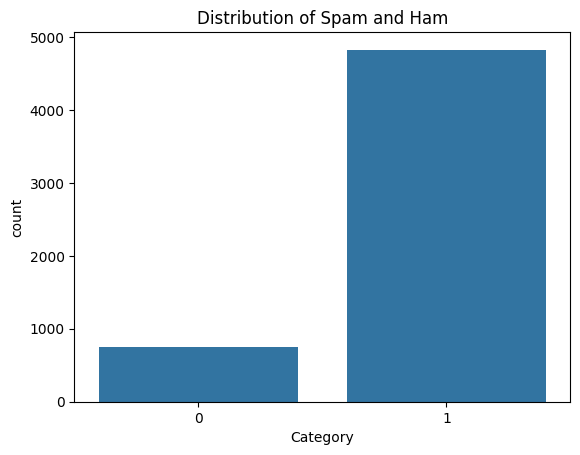

In [3]:
# Visualize data distribution
sns.countplot(data=data, x='Category')
plt.title('Distribution of Spam and Ham')
plt.show()

In [5]:
# Prepare features and labels
X = data['Message']
y = data['Category']

In [6]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Text vectorization using TfidfVectorizer
vectorizer = TfidfVectorizer(lowercase=True, stop_words='english')
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)


In [8]:
# Train Logistic Regression model
model = LogisticRegression()
model.fit(X_train_vec, y_train)

LogisticRegression()

In [9]:
# Evaluate the model
y_pred = model.predict(X_test_vec)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [10]:
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")


Accuracy: 0.95
Precision: 0.95
Recall: 1.00
F1 Score: 0.97


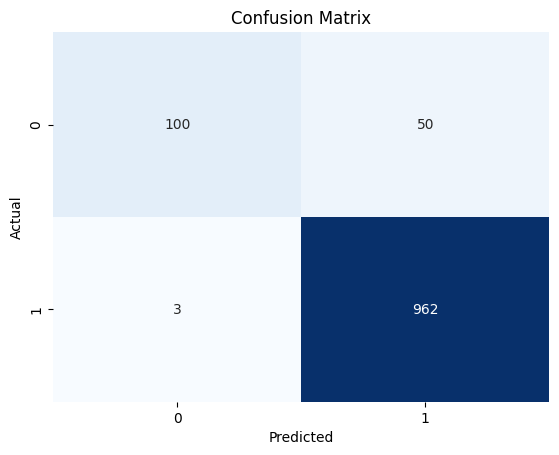

In [11]:
# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [12]:
# Spam word frequency visualization (without NLTK)
spam_messages = data[data['Category'] == 0]['Message']
spam_words = " ".join(spam_messages).split()

In [13]:
# Count word frequency
spam_word_freq = Counter([word.lower() for word in spam_words if word.isalpha()])

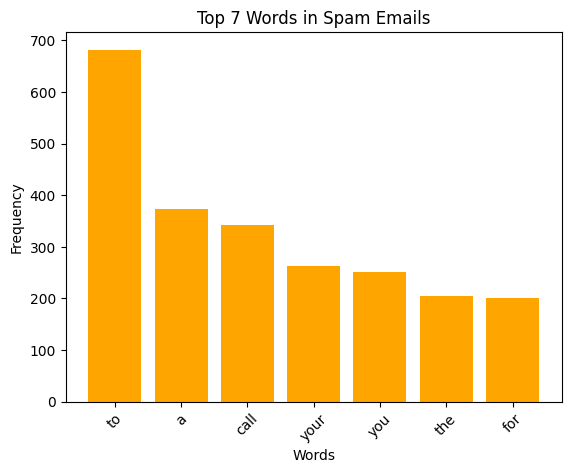

In [14]:
# Plot top 7 most common spam words
plt.bar(*zip(*spam_word_freq.most_common(7)), color='orange')
plt.title('Top 7 Words in Spam Emails')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

In [15]:
# Test with a new email
new_email = ["Congratulations! You've won a free trip. Call now!"]
new_email_vec = vectorizer.transform(new_email)
prediction = model.predict(new_email_vec)
print("Spam" if prediction[0] == 0 else "Ham")

Ham
